In [ ]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


#user user collaborative filtering


####Part 1 - Without Normalization

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
upload = files.upload()

Saving UUCF Assignment Spreadsheet (3).xls to UUCF Assignment Spreadsheet (3).xls


In [3]:
df_xls = pd.read_excel('UUCF Assignment Spreadsheet (3).xls')

In [4]:
df_xls

,Unnamed: 0,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,11: Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,12: Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,NaN,4.0,5.0,4.5,NaN,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,13: Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,5.0,4.5,4.5,5.0,3.0,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,14: American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,3.5,5.0,3.5,NaN,4.0,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,22: Pirates of the Caribbean: The Curse of the...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,4.0,4.5,4.0,NaN,1.0,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806: The Incredibles (2004),3.5,5.0,3.5,NaN,3.0,3.5,4.5,5.0,3.5,4.0,NaN,4.5,4.0,NaN,NaN,3.5,0.5,5.0,3.5,3.0,NaN,NaN,4.5,NaN,3.5
96,10020: Beauty and the Beast (1991),3.0,5.0,NaN,NaN,4.0,3.5,NaN,2.0,4.0,3.0,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,2.0,2.5,NaN,NaN,4.0,NaN,NaN
97,36657: X-Men (2000),NaN,4.5,NaN,NaN,4.0,NaN,4.5,5.0,4.0,5.0,NaN,4.0,3.5,NaN,4.0,3.5,NaN,3.0,4.0,3.5,NaN,NaN,NaN,3.0,4.0
98,36658: X2: X-Men United (2003),3.5,4.0,NaN,NaN,3.5,NaN,4.5,4.5,4.0,5.0,NaN,4.5,3.5,NaN,4.0,3.5,NaN,2.0,NaN,3.0,4.0,NaN,3.5,NaN,4.0


In [5]:
df_xls.to_csv('UUCF Assignment Spreadsheet (3).csv')

In [6]:
df_xls

,Unnamed: 0,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,11: Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,12: Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,NaN,4.0,5.0,4.5,NaN,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,13: Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,5.0,4.5,4.5,5.0,3.0,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,14: American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,3.5,5.0,3.5,NaN,4.0,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,22: Pirates of the Caribbean: The Curse of the...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,4.0,4.5,4.0,NaN,1.0,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806: The Incredibles (2004),3.5,5.0,3.5,NaN,3.0,3.5,4.5,5.0,3.5,4.0,NaN,4.5,4.0,NaN,NaN,3.5,0.5,5.0,3.5,3.0,NaN,NaN,4.5,NaN,3.5
96,10020: Beauty and the Beast (1991),3.0,5.0,NaN,NaN,4.0,3.5,NaN,2.0,4.0,3.0,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,2.0,2.5,NaN,NaN,4.0,NaN,NaN
97,36657: X-Men (2000),NaN,4.5,NaN,NaN,4.0,NaN,4.5,5.0,4.0,5.0,NaN,4.0,3.5,NaN,4.0,3.5,NaN,3.0,4.0,3.5,NaN,NaN,NaN,3.0,4.0
98,36658: X2: X-Men United (2003),3.5,4.0,NaN,NaN,3.5,NaN,4.5,4.5,4.0,5.0,NaN,4.5,3.5,NaN,4.0,3.5,NaN,2.0,NaN,3.0,4.0,NaN,3.5,NaN,4.0


In [7]:
df_xls['Unnamed: 0']

0         11: Star Wars: Episode IV - A New Hope (1977)
1                               12: Finding Nemo (2003)
2                               13: Forrest Gump (1994)
3                            14: American Beauty (1999)
4     22: Pirates of the Caribbean: The Curse of the...
                            ...                        
95                         9806: The Incredibles (2004)
96                   10020: Beauty and the Beast (1991)
97                                  36657: X-Men (2000)
98                       36658: X2: X-Men United (2003)
99                              36955: True Lies (1994)
Name: Unnamed: 0, Length: 100, dtype: object

In [8]:
# let's findout the user-user correlation matrix
cor = df_xls.corr(method = 'pearson')

In [9]:
cor

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,-0.041734,0.264425,0.261268,0.464610,0.022308,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,0.138548,0.152948,0.148882,0.562449,0.414438,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,0.011316,-0.231660,0.148431,0.267029,0.304139,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,0.282756,-0.005326,-0.087747,0.241567,0.116532,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,-0.066576,-0.093801,0.310104,-0.003878,0.113581,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
860,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,0.219929,-0.005316,0.323499,0.539066,0.181276,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
3712,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,-0.038900,-0.364324,0.126899,-0.051320,0.227130,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
2968,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,0.312573,0.053024,0.143347,-0.118085,0.100841,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
3525,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,0.243283,-0.086061,0.058365,0.475495,0.201734,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
4323,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,0.022907,0.252529,-0.221789,0.258866,-0.024337,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385


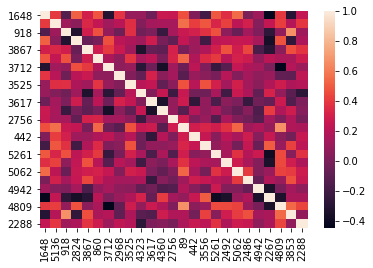

In [10]:
import seaborn as sns
sns.heatmap(cor)# plot the heatmap of correlation matrix

In [13]:
u3867 = np.round(np.array(cor[3867]),decimals = 6)# convert all element of array a number upto 6 decimal places 

In [12]:
cor.columns

Index([1648, 5136,  918, 2824, 3867,  860, 3712, 2968, 3525, 4323, 3617, 4360,
       2756,   89,  442, 3556, 5261, 2492, 5062, 2486, 4942, 2267, 4809, 3853,
       2288],
      dtype='object')

In [14]:
p = np.round(sorted(u3867,reverse = True),decimals = 6) # sort the correlation matrix of user 3867 with other user

In [15]:
p

array([ 1.      ,  0.476683,  0.46411 ,  0.438992,  0.400275,  0.379856,
        0.341734,  0.310104,  0.3002  ,  0.297977,  0.294558,  0.293868,
        0.282497,  0.264249,  0.174085,  0.125193,  0.113581,  0.054518,
       -0.003878, -0.060913, -0.066576, -0.093801, -0.162818, -0.295966,
       -0.333602])

In [16]:
user=[]
for j in range(1,6):
  for i in range(len(u3867)):
    if (u3867[i] == p[j]):
      r = i
  c = 0
  for k in cor.columns:
    if(c == r):
      user.append(k)#  top 5 user with highest correlation with 3867 user
    c+=1

In [17]:
user

[2492, 3853, 2486, 3712, 2288]

In [18]:
user_cor =  [p[x] for x in range(1,6)] # correlation of top 5 user with 3867 user

In [19]:
user_cor

[0.476683, 0.46411, 0.438992, 0.400275, 0.379856]

In [25]:
l = []
for i in range(len(df_xls)):
  l.append(np.matmul(df_xls[[2492, 3853, 2486, 3712, 2288]].fillna(0).values[i],np.array(user_cor))/np.matmul(df_xls[[2492, 3853, 2486, 3712, 2288]].notnull().astype('int').values[i],user_cor))# fill nan value with 0 and compute predicted rating for every movie
  # here 'df.notnull' is used to convert every number into 1 and convert nan value into 0
  # every prediction for every movie append to l

In [23]:
df_xls[[2492, 3853, 2486, 3712, 2288]].values[0] 

array([4.5, nan, 3.5, nan, nan])

In [24]:
df_xls[[2492, 3853, 2486, 3712, 2288]].notnull().astype('int').values[0]# use of df.notnull describe here

array([1, 0, 1, 0, 0])

In [26]:
l = np.round(l,decimals = 3)

In [27]:
l

array([4.021, 3.348, 3.749, 3.804, 3.345, 4.173, 4.028, 4.091, 4.472,
       4.18 , 3.508, 3.399, 3.   , 3.164, 4.29 , 4.4  , 4.508, 2.   ,
       3.028, 4.095, 3.668, 4.551, 3.477, 3.619, 3.227, 4.141, 3.641,
       4.241, 2.5  , 2.624, 3.892, 3.818, 4.   , 2.541, 3.371, 3.359,
       3.902, 2.699, 4.02 , 3.199, 3.   , 3.392, 2.73 , 3.159, 3.365,
       3.388, 4.331, 3.471, 2.935, 2.573, 4.394, 2.814, 3.53 , 4.169,
       3.   , 2.5  , 3.166, 2.062, 1.801, 3.798, 3.595, 3.999, 3.   ,
       2.004, 4.319, 3.872, 3.162, 2.26 , 3.086, 3.6  , 3.529, 3.358,
       2.963, 2.   , 4.052, 2.985, 3.399, 4.76 , 3.74 , 2.219, 3.771,
       2.566, 3.163, 4.095, 3.949, 1.815, 1.44 , 3.265, 3.148, 3.196,
       1.813, 2.322, 1.801, 3.   , 3.471, 4.028, 3.281, 3.555, 3.297,
       3.166])

In [28]:
p1 = np.round(sorted(l,reverse = True),decimals = 3)

In [29]:
p1

array([4.76 , 4.551, 4.508, 4.472, 4.4  , 4.394, 4.331, 4.319, 4.29 ,
       4.241, 4.18 , 4.173, 4.169, 4.141, 4.095, 4.095, 4.091, 4.052,
       4.028, 4.028, 4.021, 4.02 , 4.   , 3.999, 3.949, 3.902, 3.892,
       3.872, 3.818, 3.804, 3.798, 3.771, 3.749, 3.74 , 3.668, 3.641,
       3.619, 3.6  , 3.595, 3.555, 3.53 , 3.529, 3.508, 3.477, 3.471,
       3.471, 3.399, 3.399, 3.392, 3.388, 3.371, 3.365, 3.359, 3.358,
       3.348, 3.345, 3.297, 3.281, 3.265, 3.227, 3.199, 3.196, 3.166,
       3.166, 3.164, 3.163, 3.162, 3.159, 3.148, 3.086, 3.028, 3.   ,
       3.   , 3.   , 3.   , 3.   , 2.985, 2.963, 2.935, 2.814, 2.73 ,
       2.699, 2.624, 2.573, 2.566, 2.541, 2.5  , 2.5  , 2.322, 2.26 ,
       2.219, 2.062, 2.004, 2.   , 2.   , 1.815, 1.813, 1.801, 1.801,
       1.44 ])

In [30]:
for g in range(len(l)):
  if(l[g] == 4.76):
    print(g)

77


In [32]:
c = 0
for j in df_xls['Unnamed: 0']:
  if(c==77):
    print(j)
  c+=1#the top rated movie ID for 3867

1891: Star Wars: Episode V - The Empire Strikes Back (1980)


####Part 2 - With Normalization

In [109]:
l1 = []
for i in range(len(df_xls)):
  k = (df_xls[[2492, 3853, 2486, 3712, 2288]].fillna(0).values[i]-(df_xls[[2492, 3853, 2486, 3712, 2288]].mean(axis = 0).values))
  filter_array = np.where(k<0,0,k)
  multiply_array = np.matmul(filter_array,user_cor)
  l1.append((df_xls[3867].mean(axis = 0))+(multiply_array/np.matmul(df_xls[[2492, 3853, 2486, 3712, 2288]].notnull().astype('int').values[i],user_cor)))

In [106]:
df_xls[[2492, 3853, 2486, 3712, 2288]].fillna(0).values.mean(axis = 0)

array([2.58 , 1.665, 2.89 , 2.295, 2.46 ])

In [108]:
df_xls[[2492, 3853, 2486, 3712, 2288]].mean(axis = 0).values

array([3.44      , 3.7       , 2.89      , 4.5       , 3.36986301])

In [120]:
l1 = np.round(l1,decimals = 3)

In [112]:
p2 = np.round(sorted(l1,reverse = True),decimals = 3)

In [124]:
l1 # predicted rate of every movie sequence-wise

array([4.506, 3.708, 4.108, 3.887, 3.906, 4.558, 4.383, 4.396, 4.778,
       4.565, 4.22 , 4.229, 3.721, 3.819, 4.383, 4.494, 4.601, 3.662,
       3.816, 4.225, 4.183, 4.857, 3.786, 3.977, 4.369, 4.602, 4.275,
       4.417, 3.662, 3.7  , 4.197, 4.34 , 4.772, 3.762, 3.887, 3.98 ,
       4.406, 4.194, 4.16 , 3.804, 3.721, 4.418, 3.868, 3.707, 3.937,
       3.819, 4.46 , 3.961, 3.707, 3.662, 4.488, 3.777, 3.957, 4.309,
       3.772, 3.662, 4.046, 3.693, 3.662, 4.053, 4.085, 4.111, 3.772,
       3.662, 4.656, 3.965, 3.837, 3.662, 3.662, 3.85 , 3.977, 3.896,
       3.684, 3.662, 4.48 , 3.826, 3.959, 5.246, 4.225, 3.714, 4.126,
       3.662, 3.841, 4.225, 4.078, 3.78 , 3.662, 3.896, 3.662, 3.954,
       3.662, 3.953, 3.662, 3.772, 3.82 , 4.158, 3.953, 3.896, 3.831,
       3.864])

In [123]:
p2 # p2 is sorted order predicted rate of every movie

array([5.246, 4.857, 4.778, 4.772, 4.656, 4.602, 4.601, 4.565, 4.558,
       4.506, 4.494, 4.488, 4.48 , 4.46 , 4.418, 4.417, 4.406, 4.396,
       4.383, 4.383, 4.369, 4.34 , 4.309, 4.275, 4.229, 4.225, 4.225,
       4.225, 4.22 , 4.197, 4.194, 4.183, 4.16 , 4.158, 4.126, 4.111,
       4.108, 4.085, 4.078, 4.053, 4.046, 3.98 , 3.977, 3.977, 3.965,
       3.961, 3.959, 3.957, 3.954, 3.953, 3.953, 3.937, 3.906, 3.896,
       3.896, 3.896, 3.887, 3.887, 3.868, 3.864, 3.85 , 3.841, 3.837,
       3.831, 3.826, 3.82 , 3.819, 3.819, 3.816, 3.804, 3.786, 3.78 ,
       3.777, 3.772, 3.772, 3.772, 3.762, 3.721, 3.721, 3.714, 3.708,
       3.707, 3.707, 3.7  , 3.693, 3.684, 3.662, 3.662, 3.662, 3.662,
       3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662,
       3.662])

In [121]:
for i in range(len(l1)):
  if(l1[i] == 5.246):
    print(i)

77


In [122]:
c = 0
for j in df_xls['Unnamed: 0']:
  if(c==77):
    print(j)#the top rated movie ID for 3867
  c+=1

1891: Star Wars: Episode V - The Empire Strikes Back (1980)
